<a href="https://colab.research.google.com/github/difinative/k8-performance-check/blob/main/cleantest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the input image
input_image_path = "/content/drive/MyDrive/OCR/IMG-20230902-WA0001.jpg"
iimg = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Initialize the output image (oimg) as a copy of the input image
oimg = iimg.copy()


In [40]:
window_size = (100, 100)  # Size of the sliding window (adjust as needed)
stride = (10, 10)       # Stride for sliding the window (adjust as needed)


In [41]:
# Get the dimensions of the input image
height, width = iimg.shape

# Loop through the image with the sliding window
for y in range(0, height - window_size[1] + 1, stride[1]):
    for x in range(0, width - window_size[0] + 1, stride[0]):
        # Define the region of interest (ROI) for the sliding window
        roi = iimg[y:y + window_size[1], x:x + window_size[0]]

        # Apply adaptive thresholding to the ROI
        thresholded_roi = cv2.adaptiveThreshold(roi, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

        # Copy the processed bitmap back to oimg at the corresponding position
        oimg[y:y + window_size[1], x:x + window_size[0]] = thresholded_roi


In [42]:
# Define the parameters for noise removal
noise_kernel_size = 1  # Kernel size for noise removal (adjust as needed)

# Remove small noise spots in the background using morphological operations:
# Define the kernel for noise removal (a square kernel)
noise_removal_kernel = np.ones((noise_kernel_size, noise_kernel_size), np.uint8)

# Perform morphological opening to remove small noise spots
oimg = cv2.morphologyEx(oimg, cv2.MORPH_OPEN, noise_removal_kernel)


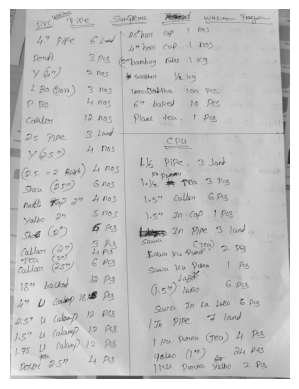

In [45]:
# Display oimg using matplotlib
plt.imshow(iimg, cmap='gray')
plt.axis('off')
plt.show()


In [44]:
# Save oimg to a file
output_image_path = "/content/drive/MyDrive/OCR/output_image.jpg"
cv2.imwrite(output_image_path, oimg)


True